# 🖥 PROYECTO DE IA
###  📊 Actividad de ML ejemplo de clasificación

El análisis de datos crediticios es la evaluación de los detalles financieros de una persona para determinar su salud financiera y su capacidad para generar flujos de caja suficientes para el servicio de la deuda. Este análisis es muy importante, ya que determina la solvencia de la persona y el nivel de riesgo crediticio asociado a la concesión de créditos. Este conjunto de datos contiene detalles crediticios de muchas personas, como su puntuación crediticia, su índice de utilización, sus ingresos anuales y muchos otros factores que muestran la situación financiera de esa persona.

### Objetivo
Analizar mediante modelos de aprendizaje de máquinas, si un usuario es rentable para adquirir una deuda, a partir de un conjunto de datos suministrados (puntuación crediticia, ingresos anuales, etc.)
### Objetivos Específicos
- Implementar los modelos de aprendizaje de máquina: regresión, árboles de decisión, random forest y redes neuronales.
- Comparar el rendimiento y resultados de los diferentes modelos.
- Realizar análisis y pruebas con los datos suministrados.
- Aplicar técnicas de preprocesamiento a conjuntos de datos para que se puedan utilizar para el entrenamiento y las pruebas de modelos

### Descripción de las variables:
- **ID**:
Representa un id único de la entrada

- **Customer_ID**:
Representa un id único de una persona

- **Month**:
Representa el mes del año

- **Name**:
Representa el nombre de una persona

- **Age**:
Representa el año de una persona

- **SSN**:
Representa el número de la seguridad social de una persona

- **Occupation**:
Representa la ocupación de la persona

- **Annual_Income**:
Represnta el ingreso anual de la persona

- **Monthly_Inhand_Salary**:
Representa el salario base mensual de una persona

- **Num_Bank_Accounts**:
Representa el número de cuenta bancaria que una persona posee

- **Num_Credit_Card**:
Representa el número de otras tarjetas de crédito poseídas por una persona

- **Interest_Rate**:
Representa la tasa de interés en una tarjeta de crédito

- **Num_of_Loan**:
Representa el número de préstamos tomados del banco

- **Type_of_Loan**:
Representa el tipo de préstamo tomado por una persona

- **Delay_from_due_date**:
Representa el número promedio de días de retraso para la fecha del pago

- **Num_of_Delayed_Payment**:
Representa el número promedio de pagos retrasados por una persona

- **Changed_Credit_Limit**:
Representa el porcentaje de cambio en límite de una tarjeta de crédito

- **Num_Credit_Inquiries**:
Representa el número de consultas de tarjetas de crédito

- **Credit_Mix**:
Representa la clasificación de la mezcla de créditos

- **Outstanding_Debt**:
Representa la deuda restante por pagar (en USD)

- **Credit_Utilization_Ratio**:
Representa el índice de utilización de la tarjeta de crédito

- **Credit_History_Age**:
Representa la antigüedad del historial crediticio de la persona

- **Payment_of_Min_Amount**:
Representa si la persona sólo ha pagado el importe mínimo

- **Total_EMI_per_month**:
Representa el pago mensual del EMI (en USD)

- **Amount_invested_monthly**:
Representa el importe mensual invertido por el cliente (en USD)

- **Payment_Behaviour**:
Representa el comportamiento de pago del cliente (en USD)

- **Monthly_Balance**:
Representa el importe del saldo mensual del cliente (en USD)

- **Credit_Score**:
Representa el rango de la calificación crediticia (mala, normal, buena)

## 📦 Importamos librerías

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
import warnings
from scipy import stats
from imblearn.under_sampling import RandomUnderSampler
import warnings
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from yellowbrick.classifier import ROCAUC

import pickle
random_state=42
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

## 🗒 Lectura, análisis y limpieza de Datos
Comenzamos por importar los archivos

In [2]:
for dirname, _, filenames in os.walk('files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

files/.DS_Store
files/test.csv
files/train.csv


In [3]:
df_origin_train = pd.read_csv('files/train.csv')
df_train = df_origin_train.copy()
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
df_origin_test = pd.read_csv('files/test.csv')
df_test = df_origin_test.copy()
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5642,3392,9,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,35.030402,273.0,No,49.574949,21.465380,Low_spent_Small_value_payments,186.266702
1,5643,3392,10,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,5644,3392,11,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,275.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,264.675446
3,5645,3392,12,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,32.430559,276.0,No,49.574949,21.465380,High_spent_Medium_value_payments,343.826873
4,5654,8625,9,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,12.0,Bad,3571.70,34.780553,78.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,275.539570
49996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,27.758522,383.0,NM,35.104023,24.028477,Low_spent_Small_value_payments,409.394562
49997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,36.858542,384.0,No,35.104023,24.028477,Low_spent_Large_value_payments,349.726332
49998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,39.139840,385.0,No,35.104023,24.028477,High_spent_Small_value_payments,463.238981


In [5]:
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [6]:
display(
    df_train.info(), 
    print(), 
    df_test.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

None

None

None

In [7]:
display(
    df_train.describe().T, 
    print(), 
    df_test.describe().T
)

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


None

,count,mean,std,min,25%,50%,75%,max
ID,50000.0,8.063750e+04,4.330170e+04,5642.000000,4.313975e+04,8.063750e+04,1.181352e+05,1.556330e+05
Customer_ID,50000.0,2.598267e+04,1.434061e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,50000.0,1.050000e+01,1.118045e+00,9.000000,9.750000e+00,1.050000e+01,1.125000e+01,1.200000e+01
Age,50000.0,3.380450e+01,1.076458e+01,14.000000,2.500000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,50000.0,5.004617e+08,2.908282e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,50000.0,5.050512e+04,3.829961e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,50000.0,4.183034e+03,3.175319e+03,303.645417,1.623555e+03,3.082272e+03,5.937530e+03,1.520463e+04
Num_Bank_Accounts,50000.0,5.369220e+00,2.594886e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,50000.0,5.533840e+00,2.071835e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,50000.0,1.453208e+01,8.741374e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [8]:
display(
    df_train.describe(exclude=np.number).T, 
    print(), 
    df_test.describe(exclude=np.number).T
)

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28108
Credit_Score,100000,3,Standard,53174


None

,count,unique,top,freq
Name,50000,10128,Jessicad,24
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,13949


In [9]:
df = pd.concat([df_train, df_test], ignore_index=True)
df = df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')
                      ).replace(' and', '').replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,24.028477,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,24.028477,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,24.028477,High_spent_Small_value_payments,463.238981,NaN


In [10]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

No hay datos nulos

## 📂 Preprocesamiento de Datos

In [11]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   150000 non-null  object
 1   Occupation             150000 non-null  object
 2   Type_of_Loan           150000 non-null  object
 3   Credit_Mix             150000 non-null  object
 4   Payment_of_Min_Amount  150000 non-null  object
 5   Payment_Behaviour      150000 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


In [12]:
df.drop(columns=['ID', 'Month', 'Name', 'SSN', 'Customer_ID'], inplace=True)

In [13]:
# Drop the Rows we can not use in model
df = df[df['Credit_Score'].notna()]
df.shape

(100000, 23)

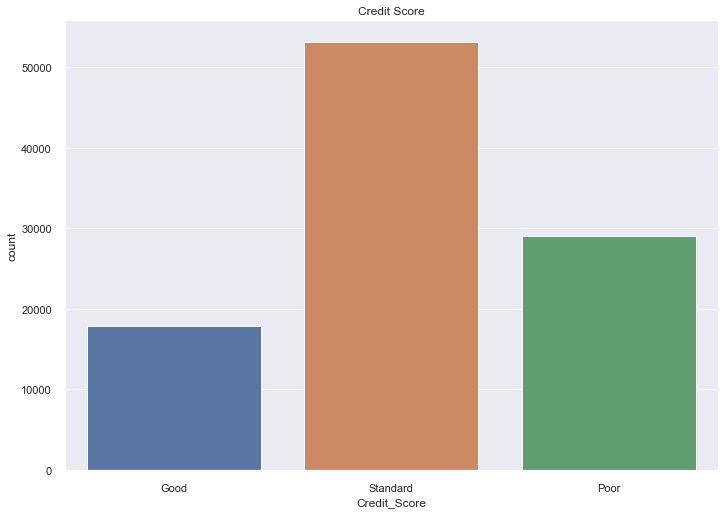

In [14]:
# Distribución de la variable a predecir
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Credit_Score", data=df)
plt.title("Credit Score")
plt.show()

<AxesSubplot:>

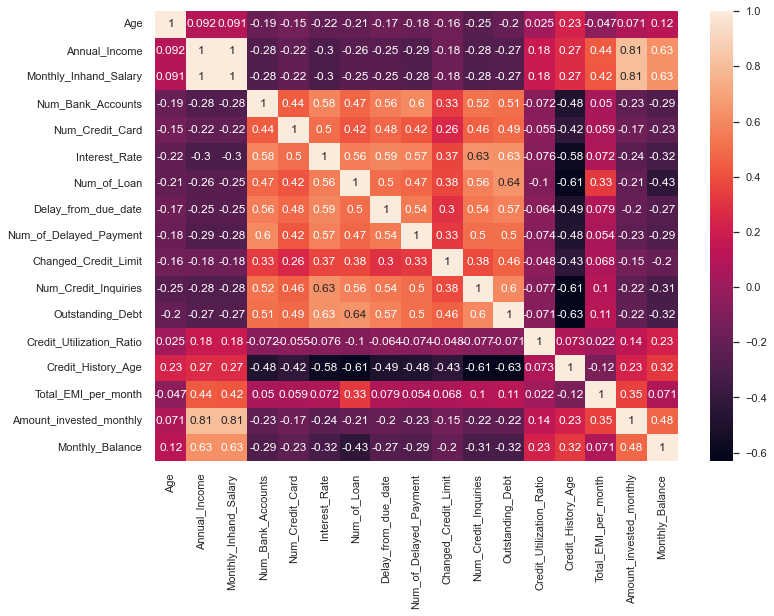

In [15]:
#Matriz de correlación para inspeccionar posibles variables predictoras relacionadas entre sí
correlation_matrix = df.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)

## ♎️ Balanceo de Datos

In [16]:
#Balanceamos los datos
undersample = RandomUnderSampler(sampling_strategy='majority')
df, credit_score = undersample.fit_resample(df, df["Credit_Score"])

In [1]:
# Distribución de la variable a predecir
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="Credit_Score", data=df)
plt.title("Credit_Score")
plt.show()

NameError: name 'sns' is not defined

### OneHotEncoder and LabelEncoder

In [2]:
df1 = df.copy()

NameError: name 'df' is not defined

In [3]:
df.info()

NameError: name 'df' is not defined

In [4]:
df.describe(include='all').T


NameError: name 'df' is not defined

### Train | Test Split

In [21]:
X = df.drop(columns="Credit_Score")
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, 

((51723, 22), (12931, 22), (51723,))

### Dummy Operation

In [22]:
X_train = X_train.join(X_train["Type_of_Loan"].str.get_dummies(sep = ",").add_prefix("tol_"))
X_test = X_test.join(X_test["Type_of_Loan"].str.get_dummies(sep = ",").add_prefix("tol_"))
X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"

X_train.drop(columns=["Type_of_Loan"], inplace = True)
X_test.drop(columns=["Type_of_Loan"], inplace = True)

X_train.shape, X_test.shape

((51723, 49), (12931, 49))

### OneHotEncoder and LabelEncoder


In [23]:
cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train[cat]), index = X_train.index, 
    columns = enc.get_feature_names_out(cat)
)    
X_test_cat  = pd.DataFrame(
    enc.transform(X_test[cat]), index = X_test.index, 
    columns = enc.get_feature_names_out(cat)
)    
X_train_enc = X_train_cat.join(X_train.select_dtypes("number"))
X_test_enc = X_test_cat.join(X_test.select_dtypes("number"))

X_train_enc.shape, X_test_enc.shape


((51723, 72), (12931, 72))

### Scale Data

In [24]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51723 entries, 48986 to 56422
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               51723 non-null  float64
 1   Occupation                        51723 non-null  object 
 2   Annual_Income                     51723 non-null  float64
 3   Monthly_Inhand_Salary             51723 non-null  float64
 4   Num_Bank_Accounts                 51723 non-null  float64
 5   Num_Credit_Card                   51723 non-null  float64
 6   Interest_Rate                     51723 non-null  float64
 7   Num_of_Loan                       51723 non-null  float64
 8   Delay_from_due_date               51723 non-null  float64
 9   Num_of_Delayed_Payment            51723 non-null  float64
 10  Changed_Credit_Limit              51723 non-null  float64
 11  Num_Credit_Inquiries              51723 non-null  float64
 12  

### Logistica de Regresión

In [26]:
lr = LogisticRegression().fit(X_train_scaled, y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test  = lr.predict(X_test_scaled)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.67      0.81      0.73     14304
        Poor       0.79      0.77      0.78     23147
    Standard       0.66      0.55      0.60     14272

    accuracy                           0.72     51723
   macro avg       0.71      0.71      0.70     51723
weighted avg       0.72      0.72      0.72     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.66      0.81      0.73      3524
        Poor       0.80      0.77      0.78      5851
    Standard       0.65      0.54      0.59      3556

    accuracy                           0.72     12931
   macro avg       0.70      0.71      0.70     12931
weighted avg       0.72      0.72      0.72     12931



#### With Best Parameters (GridsearchCV)

In [27]:
model = LogisticRegression(    
    class_weight = "balanced",
    max_iter=10000,
    random_state=random_state
)
param_grid = {
    "penalty" : ['l1'],
    "C" : [0.1],
    "solver" : ['saga'], # 'liblinear', 
}
# Identify people with low credit scores
grid_model_log = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    n_jobs=-1,
    cv=5
)


In [28]:
%%time
grid_model_log.fit(X_train_scaled, y_train)
# Suppressing a warning 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

CPU times: user 1.56 s, sys: 146 ms, total: 1.71 s
Wall time: 6.07 s


In [29]:
grid_model_log.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [30]:
grid_model_log.best_score_

0.7041548274401664

In [31]:
y_pred_train = grid_model_log.predict(X_train_scaled)
y_pred_test  = grid_model_log.predict(X_test_scaled)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.65      0.84      0.73     14304
        Poor       0.83      0.69      0.75     23147
    Standard       0.61      0.60      0.61     14272

    accuracy                           0.71     51723
   macro avg       0.70      0.71      0.70     51723
weighted avg       0.72      0.71      0.71     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.64      0.83      0.73      3524
        Poor       0.84      0.69      0.76      5851
    Standard       0.60      0.60      0.60      3556

    accuracy                           0.70     12931
   macro avg       0.69      0.71      0.69     12931
weighted avg       0.72      0.70      0.71     12931



### Implementando Random Forest Classifier

#### OrdinalEncoder

In [32]:
cat = X_train.select_dtypes(exclude="number").columns.to_list()    
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[cat] = enc.fit_transform(X_train[cat])
X_test[cat] = enc.transform(X_test[cat])

X_train.shape, X_test.shape

((51723, 49), (12931, 49))

### RandomForestClassifier

In [33]:
rfc_model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [34]:
%%time
rfc_model.fit(X_train, y_train)

CPU times: user 9.72 s, sys: 65 ms, total: 9.79 s
Wall time: 9.82 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
y_pred_train = rfc_model.predict(X_train)
y_pred_test  = rfc_model.predict(X_test)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     14304
        Poor       1.00      1.00      1.00     23147
    Standard       1.00      1.00      1.00     14272

    accuracy                           1.00     51723
   macro avg       1.00      1.00      1.00     51723
weighted avg       1.00      1.00      1.00     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.86      0.90      0.88      3524
        Poor       0.89      0.94      0.91      5851
    Standard       0.79      0.67      0.72      3556

    accuracy                           0.85     12931
   macro avg       0.84      0.84      0.84     12931
weighted avg       0.85      0.85      0.85     12931



#### Usando GridSearchCV

In [36]:
model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'max_depth': [3], 
    'n_estimators': [10],
    'max_features': [None],
}

grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    refit=True,
    n_jobs=-1,
    cv=5,
)

In [37]:
%%time
grid_model_rfc.fit(X_train, y_train)

CPU times: user 1.18 s, sys: 10.6 ms, total: 1.19 s
Wall time: 3.14 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3], 'max_features': [None],
                         'n_estimators': [10]})

In [38]:
grid_model_rfc.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 10}

In [39]:
grid_model_rfc.best_score_

0.7283606301843925

In [40]:
y_pred_train = grid_model_rfc.predict(X_train)
y_pred_test  = grid_model_rfc.predict(X_test)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.69      0.75      0.72     14304
        Poor       0.79      0.80      0.80     23147
    Standard       0.66      0.58      0.62     14272

    accuracy                           0.73     51723
   macro avg       0.71      0.71      0.71     51723
weighted avg       0.73      0.73      0.73     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.68      0.76      0.72      3524
        Poor       0.80      0.81      0.80      5851
    Standard       0.66      0.58      0.62      3556

    accuracy                           0.73     12931
   macro avg       0.71      0.71      0.71     12931
weighted avg       0.73      0.73      0.73     12931



### Árboles de decisión

In [41]:
dt = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)

In [42]:
%%time
dt.fit(X_train , y_train)

CPU times: user 490 ms, sys: 1.8 ms, total: 492 ms
Wall time: 490 ms


DecisionTreeClassifier(max_depth=10)

In [43]:
dt_score_train=dt.score(X_train , y_train)
dt_score_train

0.7752257216325426

In [44]:
dt_score_test=dt.score(X_test , y_test)
dt_score_test

0.7576366870311654

In [45]:
y_pred_train = dt.predict(X_train)
y_pred_test  = dt.predict(X_test)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.72      0.85      0.78     14304
        Poor       0.84      0.83      0.84     23147
    Standard       0.73      0.60      0.66     14272

    accuracy                           0.78     51723
   macro avg       0.76      0.76      0.76     51723
weighted avg       0.78      0.78      0.77     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.70      0.83      0.76      3524
        Poor       0.83      0.82      0.83      5851
    Standard       0.69      0.58      0.63      3556

    accuracy                           0.76     12931
   macro avg       0.74      0.74      0.74     12931
weighted avg       0.76      0.76      0.76     12931



#### Usando GridSearchCV

In [46]:
model = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)
param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':[10,20,30,40,50],
              }
grid_model_dt = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    refit=True,
    n_jobs=-1,
    cv=5,
)

In [47]:
%%time
grid_model_dt.fit(X_train, y_train)

CPU times: user 905 ms, sys: 171 ms, total: 1.08 s
Wall time: 11.9 s


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'splitter': ['best', 'random']})

In [48]:
grid_model_dt.best_params_

{'criterion': 'gini', 'max_depth': 40, 'splitter': 'random'}

In [49]:
grid_model_dt.best_score_

0.765268843611565

In [50]:
y_pred_train = grid_model_dt.predict(X_train)
y_pred_test  = grid_model_dt.predict(X_test)
print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     14304
        Poor       1.00      1.00      1.00     23147
    Standard       1.00      1.00      1.00     14272

    accuracy                           1.00     51723
   macro avg       1.00      1.00      1.00     51723
weighted avg       1.00      1.00      1.00     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.82      0.82      0.82      3524
        Poor       0.85      0.85      0.85      5851
    Standard       0.63      0.63      0.63      3556

    accuracy                           0.78     12931
   macro avg       0.77      0.77      0.77     12931
weighted avg       0.78      0.78      0.78     12931



### Redes Neuronales: MLPClassifier

In [51]:
nn = MLPClassifier(random_state=random_state)

In [52]:
%%time
nn.fit(X_train , y_train)

CPU times: user 32.1 s, sys: 6.9 s, total: 39.1 s
Wall time: 5.6 s


MLPClassifier(random_state=42)

In [53]:
nn_score_train=nn.score(X_train , y_train)
nn_score_train

0.5285462946851497

In [54]:
nn_score_test=nn.score(X_test , y_test)
nn_score_test

0.5315907509086691

In [55]:
y_pred_train = nn.predict(X_train)
y_pred_test  = nn.predict(X_test)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.73      0.07      0.12     14304
        Poor       0.61      0.86      0.72     23147
    Standard       0.36      0.45      0.40     14272

    accuracy                           0.53     51723
   macro avg       0.57      0.46      0.41     51723
weighted avg       0.58      0.53      0.46     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.73      0.07      0.13      3524
        Poor       0.61      0.86      0.72      5851
    Standard       0.36      0.44      0.40      3556

    accuracy                           0.53     12931
   macro avg       0.57      0.46      0.42     12931
weighted avg       0.58      0.53      0.47     12931



#### Usando GridSearchCV

In [56]:
model = MLPClassifier(random_state=random_state)
param_grid = {
    'hidden_layer_sizes': [(8,),(16,),(24,),(32,)],
    'alpha':[0.001, 0.01, 0.1]
}

grid_model_mlp = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    refit=True,
    n_jobs=-1,
    cv=5,
)

In [57]:
%%time
grid_model_mlp.fit(X_train, y_train)

CPU times: user 16.7 s, sys: 4.6 s, total: 21.2 s
Wall time: 39.8 s


GridSearchCV(cv=5, error_score='raise',
             estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(8,), (16,), (24,), (32,)]})

In [58]:
grid_model_mlp.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (16,)}

In [59]:
grid_model_mlp.best_score_

0.6058247555245051

In [60]:
y_pred_train = grid_model_mlp.predict(X_train)
y_pred_test  = grid_model_mlp.predict(X_test)
print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.71      0.18      0.29     14304
        Poor       0.76      0.67      0.71     23147
    Standard       0.37      0.72      0.49     14272

    accuracy                           0.55     51723
   macro avg       0.61      0.53      0.50     51723
weighted avg       0.64      0.55      0.54     51723

----------------------------------------------------------
              precision    recall  f1-score   support

        Good       0.72      0.20      0.31      3524
        Poor       0.77      0.68      0.72      5851
    Standard       0.38      0.73      0.50      3556

    accuracy                           0.56     12931
   macro avg       0.62      0.53      0.51     12931
weighted avg       0.65      0.56      0.55     12931



## Resultados y comparación de los modelos

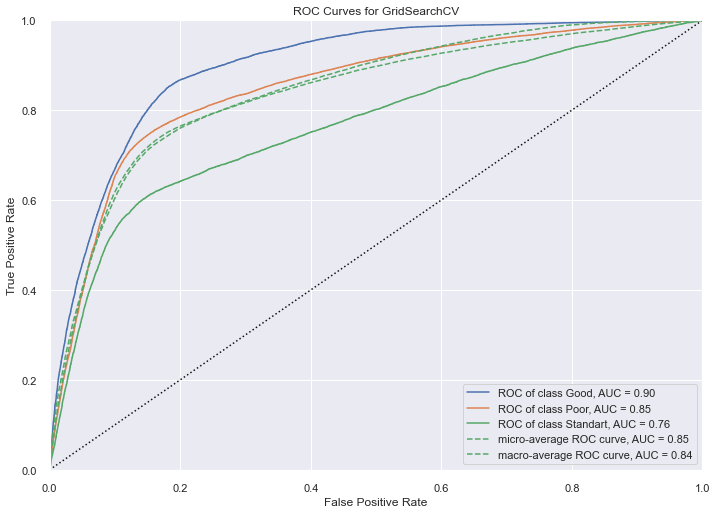

In [61]:
model = grid_model_log

visualizer = ROCAUC(model, classes=['Good', 'Poor', 'Standart'])
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train_scaled, y_train)        # Evaluate the model on the test data
visualizer.show(); 

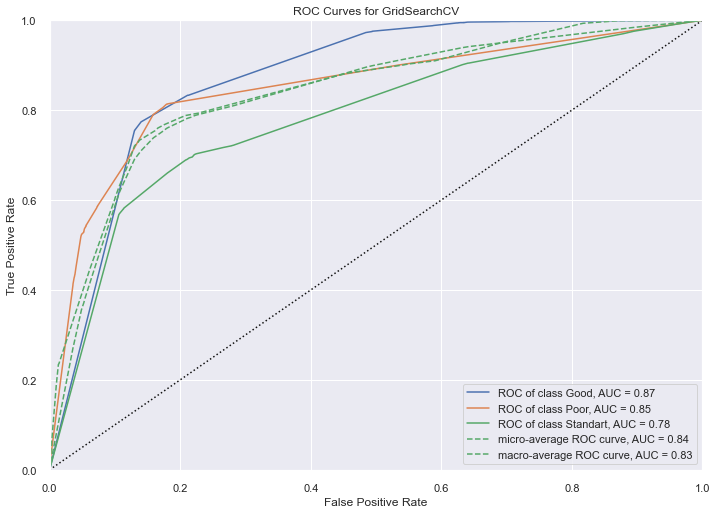

In [62]:
model = grid_model_rfc

visualizer = ROCAUC(model, classes=['Good', 'Poor', 'Standart'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_train, y_train)        # Evaluate the model on the test data
visualizer.show(); 

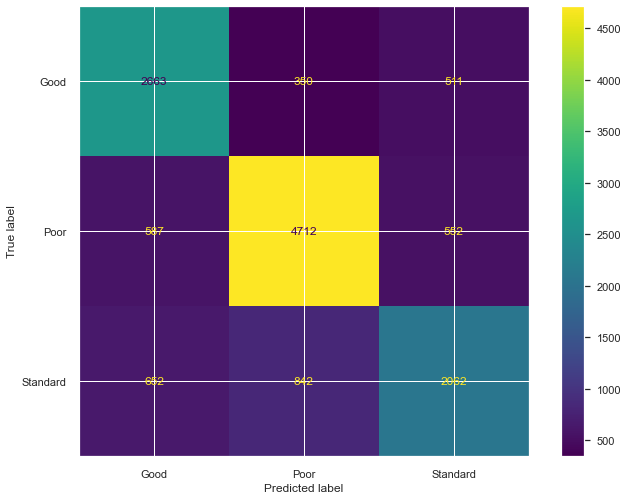

In [63]:
plot_confusion_matrix(grid_model_rfc, X_test, y_test);

### Conclusiones

La evidencia presentada nos lleva a concluir que el análisis de datos es esencial para evaluar el estado financiero de múltiples usuarios, y toma un papel crucial al momento de considerar a un posible beneficiario para la obtención de un crédito bancario, permitiendo a la institución bancaria considerar los riesgos y beneficios que se obtendrán con la aprobación del préstamo.

Para que el modelo haga buenas predicciones, el conjunto de datos debe estar limpio. A menudo, puede encontrar datos nulos en algunas variables. Entonces se llenan esos espacios nulos con el valor promedio de cada variable. Ninguna de las variables depende de la otra porque la correlación que existe entre ellas es muy baja y es importante dejar a cada una sola ya que informa al modelo.

Finalmente, los modelos de aprendizaje de máquina son muy útiles para predecir situaciones del mundo real en función de ciertos datos, y aunque algunos modelos funcionan mejor que otros, todos son útiles y su aplicación depende de la complejidad de las predicciones.